# Projeto 1
Nosso primeiro projeto avaliativo, consistindo em 15% da nota final no curso, será uma aplicação de aprendizado supervisionado: classificar discursos presidenciais feitos para audiências internacionais. Ao todo, são 350 discursos proferidos por Lula, Dilma e Temer que poderão ser utilizados para teste e treino de modelos. Neste trabalho, vocês poderão aplicar o pré-processamento que julgarem mais adequado.

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import RSLPStemmer
from sklearn import metrics
import matplotlib.pyplot as plt
import re
import unidecode
from nltk.corpus import stopwords
import numpy as np
import spacy
import re

In [2]:
link = 'https://github.com/FLS-6497/datasets/blob/main/projeto1/discursos_pres_internacionais.csv?raw=true'
discursos = pd.read_csv(link, sep=';')

link = 'https://github.com/FLS-6497/datasets/blob/main/projeto1/discursos_pres_internacionais_validacao.csv?raw=true'
validacao = pd.read_csv(link, sep=';')

## Explorar dados


In [2]:
discursos.head()

NameError: name 'discursos' is not defined

In [ ]:
discursos["presidente"].unique()

array(['Temer', 'Dilma', 'Lula'], dtype=object)

In [ ]:
discursos['presidente'].value_counts()

Lula     145
Dilma    131
Temer     74
Name: presidente, dtype: int64

In [ ]:
stopwords_pt =  stopwords.words('portuguese')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [8]:
nlp = spacy.load("pt_core_news_lg")

In [14]:
doc = nlp("patos passa passei passou amei amo")
for t in doc:
    print(t.lemma_)

pato
passar
passar
passar
amei
amo


## Processamento


In [8]:
def Processamento1(texto):
    doc = nlp(texto)
    tokens = [t.lemma_ for t in doc if len(t) > 4]
    tokens = [t for t in tokens if t not in stopwords_pt]
    tokens = [t.lower() for t in tokens]
    tokens = [unidecode.unidecode(t) for t in tokens]
    return " ".join(tokens)

def Processamento2(texto):
    tokens = word_tokenize(texto,language="portuguese")
    tokens = [t for t in tokens if len(t) > 4]
    tokens = [t for t in tokens if t not in stopwords_pt]
    tokens = [t.lower() for t in tokens]
    tokens = [unidecode.unidecode(t) for t in tokens]
    return " ".join(tokens)

def Processamento3(texto):
    tokens = word_tokenize(texto,language="portuguese")
    tokens = [t for t in tokens if len(t) > 4]
    tokens = [t for t in tokens if t not in stopwords_pt]
    
    tokens = [t.lower() for t in tokens]
    tokens = [unidecode.unidecode(t) for t in tokens]
    stem = RSLPStemmer()
    token_stem = [stem.stem(t) for t in tokens]
    return " ".join(token_stem)



In [9]:
p_discursos1 = [Processamento1(discurso) for discurso in discursos['discurso']]
p_discursos2 = [Processamento2(discurso) for discurso in discursos['discurso']]
p_discursos3 = [Processamento3(discurso) for discurso in discursos['discurso']]


In [10]:
discursos['discurso1'] = p_discursos1
discursos['discurso2'] = p_discursos2
discursos['discurso3'] = p_discursos3


In [11]:
discursos.head()

,data,presidente,discurso,discurso1,discurso2,discurso3
0,2018-11-30,Temer,"\nHá uma década, desencadeava-se crise econômi...",decada desencadeava-se crise economico ter efe...,decada desencadeava-se crise economica efeitos...,dec desencadeava-s cris econom efeit sistem ne...
1,2018-11-30,Temer,"\nAntes de mais nada, cumprimento o Presidente...",antes cumprimento presidente macri governo arg...,antes cumprimento presidente macri governo arg...,ant cumpr presid macr govern argentin impeca o...
2,2018-11-30,Temer,\nDiscurso do presidente Michel Temer\nSenhor ...,discurso presidente michel temer senhor presid...,discurso presidente michel temer senhor presid...,discurs presid michel tem senh presid senh sen...
3,2018-09-25,Temer,"\nSenhora Presidente desta Assembleia Geral, M...",senhora presidente de este assembleia geral ma...,senhora presidente desta assembleia geral mari...,senh presid dest assemble geral mar fernand es...
4,2018-06-18,Temer,"\nPrezados amigos,\nPresidentes, vice-presiden...",prezado amigo presidente vice-presidente horac...,prezados amigos presidentes vice-presidentes h...,prez amig presid vice-presid horaci cart tab v...


## Modelos

In [12]:
def Contagemtdf(base,coluna_X, coluna_Y):
    Base_discursos = base
    X_train, X_test, Y_train, Y_test = train_test_split(Base_discursos[coluna_X], Base_discursos[coluna_Y], test_size=0.7)
    tfid_1 = TfidfVectorizer(analyzer='word',min_df=0.1)
    X_train_corpus = tfid_1.fit_transform(X_train) 
    X_test_corpus = tfid_1.transform(X_test)    
    return X_train_corpus, X_test_corpus, Y_train, Y_test, tfid_1

def ModeloNB(X_train_corpus, X_test_corpus, Y_train, Y_test): 

    nb_classifier = MultinomialNB()   
    nb_classifier.fit(X_train_corpus, Y_train)    
    pred = nb_classifier.predict(X_test_corpus)
    score = metrics.precision_score(Y_test,pred,average='micro')
    cm = metrics.confusion_matrix(Y_test,pred,labels=Y_test.unique())
    
    return score,cm, Y_test, pred, nb_classifier

def ModeloRF(X_train_corpus, X_test_corpus, Y_train, Y_test):
    rf_classifier = RandomForestClassifier()   
    rf_classifier.fit(X_train_corpus, Y_train)    
    pred = rf_classifier.predict(X_test_corpus)
    score = metrics.precision_score(Y_test,pred,average='micro')
    cm = metrics.confusion_matrix(Y_test,pred,labels=Y_test.unique())
    
    return score,cm, Y_test, pred, rf_classifier

## Escolha do modelo


In [13]:
#Escolha de modelos e processamento

score_pre1_NB = []
score_pre2_NB = []
score_pre3_NB = []
score_pre1_RF = []
score_pre2_RF = []
score_pre3_RF = []


for n in range(1,101):
    X_train_corpus, X_test_corpus, Y_train, Y_test,tfid1 = Contagemtdf(discursos,"discurso1","presidente")
    
    score,cm, Y_test, pred, nb_classifier = ModeloNB(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre1_NB.append(score)

    score,cm, Y_test, pred, nb_classifier = ModeloRF(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre1_RF.append(score)

    X_train_corpus, X_test_corpus, Y_train, Y_test,tfid1 = Contagemtdf(discursos,"discurso2","presidente")
    
    score,cm, Y_test, pred, nb_classifier = ModeloNB(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre2_NB.append(score)

    score,cm, Y_test, pred, nb_classifier = ModeloRF(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre2_RF.append(score)

    X_train_corpus, X_test_corpus, Y_train, Y_test,tfid1 = Contagemtdf(discursos,"discurso3","presidente")
    
    score,cm, Y_test, pred, nb_classifier = ModeloNB(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre3_NB.append(score)

    score,cm, Y_test, pred, nb_classifier = ModeloRF(X_train_corpus, X_test_corpus, Y_train, Y_test)
    score_pre3_RF.append(score)




In [26]:
resultados = pd.DataFrame([score_pre1_NB,score_pre2_NB,score_pre3_NB,score_pre1_RF,score_pre2_RF,score_pre3_RF]).T
resultados.rename({0:'NB - Lemmatização',1:'NB - Básico',2:'NB - Stem',3:'RF - Lemmatização',4:'RF - Básico',5:'RF - Stem'},axis=1, inplace= True)

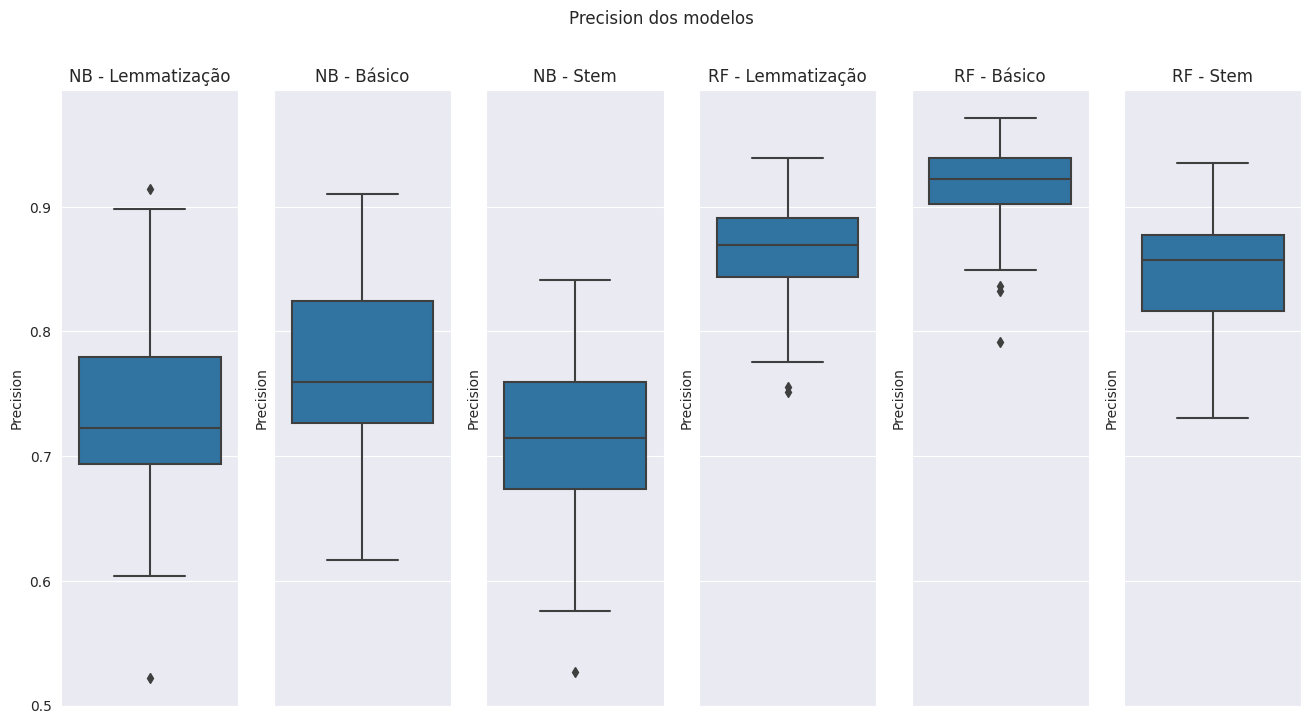

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,6,sharey=True,figsize=(16,8))
fig.suptitle("Precision dos modelos")
for i in range(0,6):
    temp = resultados.iloc[:,i]
    nome = resultados.columns[i]
    sns.boxplot(ax=ax[i],y=temp)
    ax[i].set_title(nome)
    ax[i].set(ylabel="Precision")



### Comentário

In [16]:
def ModeloNB_a(X_train_corpus, X_test_corpus, Y_train, Y_test, alpha): 

    nb_classifier = MultinomialNB(alpha=alpha)   
    nb_classifier.fit(X_train_corpus, Y_train)    
    pred = nb_classifier.predict(X_test_corpus)
    score = metrics.precision_score(Y_test,pred,average='micro')
    cm = metrics.confusion_matrix(Y_test,pred,labels=Y_test.unique())
    
    return score,cm, Y_test, pred, nb_classifier

In [42]:
recall_lista = []  
alphas = np.arange(0.1,1.1,0.1)  
for x in alphas:
    scores_lista = []
    for i in range(0,30): 
        X_train_corpus, X_test_corpus, Y_train, Y_test, tfid1 = Contagemtdf(discursos,"discurso2","presidente")
        score,cm, Y_test, pred, nb_classifier = ModeloNB_a(X_train_corpus, X_test_corpus, Y_train, Y_test, x)
        scores_lista.append(score)
    
    recall_lista.append(scores_lista)

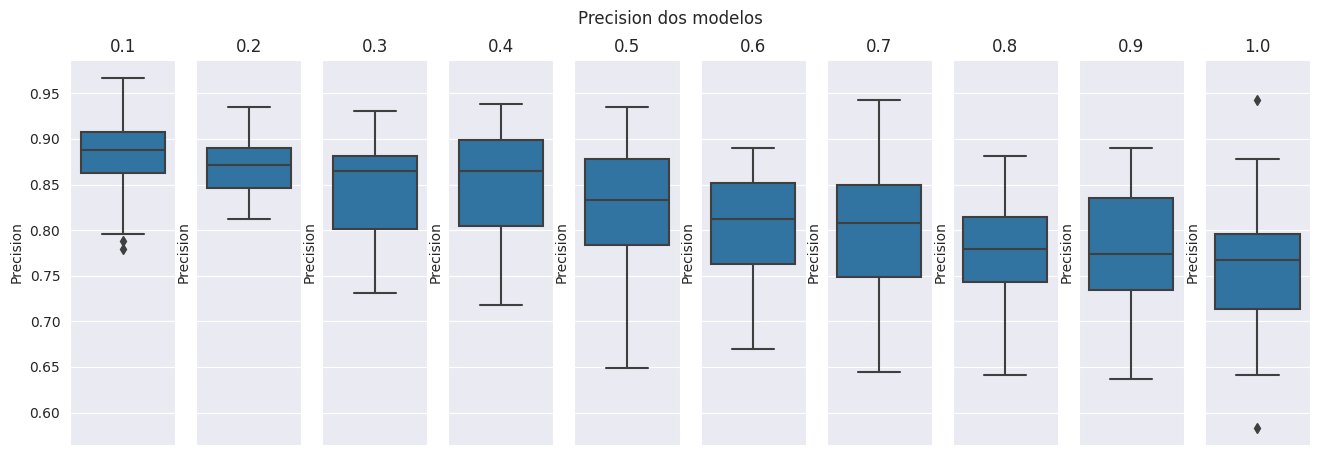

In [49]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,10,sharey=True,figsize=(16,5))
fig.suptitle("Precision dos modelos")
for i in range(0,10):
    temp = recall_lista[i]
    nome = np.round(alphas[i],1)
    sns.boxplot(ax=ax[i],y=temp)
    ax[i].set_title(nome)
    ax[i].set(ylabel="Precision")

# g = sns.boxplot(y=recall_lista,x=np.round(alphas,1))
#g.set(title="Precision por alpha")

### Comentário


In [50]:
X_train_corpus, X_test_corpus, Y_train, Y_test, tfid1 = Contagemtdf(discursos,"discurso2","presidente")
score_nb, cm_nb, Y_test_nb, pred_nb, nb_classifier = ModeloNB_a(X_train_corpus, X_test_corpus, Y_train, Y_test, 0.2)
score_rf, cm_rf, Y_test_rf, pred_rf, rf_classifier = ModeloRF(X_train_corpus, X_test_corpus, Y_train, Y_test)

In [51]:
print("Checagem de dataframe Y: ",  Y_test_nb.equals(Y_test_rf))
print("Recall Score: ", score_nb, " (nb) ", score_rf, " (rf) ")

Checagem de dataframe Y:  True
Recall Score:  0.9061224489795918  (nb)  0.9387755102040817  (rf) 


In [21]:
temp_df = pd.DataFrame([pred_nb,pred_rf]).T
temp_df.rename({0:"NB",1:"RF"},axis=1,inplace=True)
temp_df['Concordam'] = temp_df['NB'] == temp_df['RF']
sum(temp_df['Concordam'])/245

0.8612244897959184

In [23]:
pred_nb_v = nb_classifier.predict(v_matrix)
pred_rf_v = rf_classifier.predict(v_matrix)
pred_valida = pd.DataFrame([pred_nb_v,pred_rf_v]).T
pred_valida.rename({0:"NB",1:"RF"},axis=1,inplace=True)
pred_valida['Concordam'] = pred_valida['NB'] == pred_valida['RF']
pred_valida = pd.concat([validacao,pred_valida],axis=1)
sum(pred_valida['Concordam'])/25

0.88

In [24]:
pred_valida.head()

,discurso,id,v_discurso2,NB,RF,Concordam
0,"\nExcelentíssimo senhor Shinzo Abe, primeiro-m...",137,excelentissimo senhor shinzo primeiro-ministro...,Dilma,Dilma,True
1,\nFoto: Roberto Stuckert Filho/PR \n \nSenhor ...,90,roberto stuckert filho/pr senhor laurent fabiu...,Dilma,Dilma,True
2,"\nExcelentíssimo senhor Paul Biya, presidente ...",229,excelentissimo senhor presidente cameroun senh...,Dilma,Lula,False
3,"\nEu quero cumprimentar, em primeiro lugar, a ...",7,quero cumprimentar primeiro lugar senhora mari...,Temer,Temer,True
4,\nQuero dirigir um cumprimento especial à Zole...,91,quero dirigir cumprimento especial zoleka mand...,Dilma,Dilma,True


In [ ]:
pred_valida.to_excel("Validação_v2.xlsx")